Loading dữ liệu đầu vào

In [9]:
import pandas as pd

# Load the datasets
final_data = pd.read_csv('final_data.csv')
ppi_data = pd.read_csv('previous_season_ppi.csv')

# Check the first few rows of each dataset
print(final_data.head())
print(ppi_data.head())


   Unnamed: 0   GAME_ID  SCOREMARGIN  TIME_REMAINING  PERIOD TEAM_1 TEAM_2  \
0           0  22400061            0               0       1    NYK    BOS   
1           1  22400061            0               0       1    NYK    BOS   
2           2  22400061            3              12       1    NYK    BOS   
3           3  22400061            1              33       1    NYK    BOS   
4           4  22400061            1              44       1    NYK    BOS   

   PLAYER_1.1 PLAYER_1.2          PLAYER_1.3     PLAYER_1.4     PLAYER_1.5  \
0  OG Anunoby  Josh Hart  Karl-Anthony Towns  Mikal Bridges  Jalen Brunson   
1  OG Anunoby  Josh Hart  Karl-Anthony Towns  Mikal Bridges  Jalen Brunson   
2  OG Anunoby  Josh Hart  Karl-Anthony Towns  Mikal Bridges  Jalen Brunson   
3  OG Anunoby  Josh Hart  Karl-Anthony Towns  Mikal Bridges  Jalen Brunson   
4  OG Anunoby  Josh Hart  Karl-Anthony Towns  Mikal Bridges  Jalen Brunson   

     PLAYER_2.1    PLAYER_2.2  PLAYER_2.3     PLAYER_2.4    PL

Dùng Dictionary để map tên cầu thủ và rating

In [10]:
# Assuming 'Player Name' and 'Player Rating' are the relevant columns in ppi_data
player_rating_map = dict(zip(ppi_data['Player'], ppi_data['PPI']))


Thay thế các cột tên Player trong Final Data bằng PPI

In [11]:
# Identify player columns in final_data
player_columns = [col for col in final_data.columns if 'PLAYER' in col]

# Replace player names with ratings
for col in player_columns:
    final_data[col] = final_data[col].map(player_rating_map)


Thay thế những cột trống bằng rating thấp nhất

In [12]:
# Replace missing ratings with a default value, e.g., 0
final_data[player_columns] = final_data[player_columns].fillna(0.75)


Thêm cột để kiểm tra đội 1 thắng hay thua

In [13]:
# Add a new column to indicate whether TEAM_1 is the winner
final_data['TEAM_1_WIN'] = (final_data['WINNER'] == final_data['TEAM_1']).astype(int)

Chuyển dữ liệu dạng Object sang String

In [14]:
# Change the data types of WINNER, TEAM_1, and TEAM_2 to string
columns_to_convert = ['WINNER', 'TEAM_1', 'TEAM_2']
final_data[columns_to_convert] = final_data[columns_to_convert].astype(str)
print(final_data.dtypes)

Unnamed: 0          int64
GAME_ID             int64
SCOREMARGIN         int64
TIME_REMAINING      int64
PERIOD              int64
TEAM_1             object
TEAM_2             object
PLAYER_1.1        float64
PLAYER_1.2        float64
PLAYER_1.3        float64
PLAYER_1.4        float64
PLAYER_1.5        float64
PLAYER_2.1        float64
PLAYER_2.2        float64
PLAYER_2.3        float64
PLAYER_2.4        float64
PLAYER_2.5        float64
SCORE_1             int64
SCORE_2             int64
WINNER             object
TEAM_1_WIN          int32
dtype: object


In [15]:
final_data.describe()

,Unnamed: 0,GAME_ID,SCOREMARGIN,TIME_REMAINING,PERIOD,PLAYER_1.1,PLAYER_1.2,PLAYER_1.3,PLAYER_1.4,PLAYER_1.5,PLAYER_2.1,PLAYER_2.2,PLAYER_2.3,PLAYER_2.4,PLAYER_2.5,SCORE_1,SCORE_2,TEAM_1_WIN
count,124992.000000,1.249920e+05,124992.000000,124992.000000,124992.000000,124992.000000,124992.000000,124992.000000,124992.000000,124992.000000,124992.000000,124992.000000,124992.000000,124992.000000,124992.000000,124992.000000,124992.000000,124992.000000
mean,62495.500000,2.240015e+07,1.895225,1493.998784,2.544083,1.016992,1.087850,1.225994,1.093347,1.257453,1.021319,1.118920,1.249273,1.075193,1.246124,57.081781,58.977007,0.374840
std,36082.226761,8.101250e+01,11.004336,847.929976,1.134121,0.282840,0.334376,0.335723,0.280427,0.378461,0.257325,0.356616,0.361722,0.293563,0.396988,33.626362,34.131542,0.484084
min,0.000000,2.240000e+07,-45.000000,0.000000,1.000000,0.744550,0.744550,0.750000,0.723077,0.750000,0.750000,0.744550,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000
25%,31247.750000,2.240009e+07,-4.000000,761.000000,2.000000,0.750000,0.750000,0.863158,0.835662,0.889362,0.750000,0.750000,0.863158,0.750000,0.832026,28.000000,30.000000,0.000000
50%,62495.500000,2.240015e+07,2.000000,1482.000000,3.000000,0.883575,0.992473,1.323711,1.109253,1.270100,0.944681,1.025506,1.323711,1.045087,1.187372,56.000000,58.000000,0.000000
75%,93743.250000,2.240022e+07,9.000000,2212.250000,4.000000,1.210145,1.357098,1.423529,1.268391,1.542400,1.197318,1.369643,1.506433,1.270100,1.542400,85.000000,87.000000,1.000000
max,124991.000000,2.240028e+07,41.000000,3600.000000,5.000000,2.015625,2.015625,2.041618,1.707453,2.176800,1.761345,2.015625,2.041618,1.672571,2.176800,145.000000,144.000000,1.000000


Thử nghiệm XGBoost

In [16]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Features (X) and Target (y)
from sklearn.preprocessing import StandardScaler

numerical_cols = ['SCOREMARGIN', 'TIME_REMAINING','PERIOD','PLAYER_1.1','PLAYER_1.2','PLAYER_1.3','PLAYER_1.4','PLAYER_1.5','PLAYER_2.1','PLAYER_2.2','PLAYER_2.3','PLAYER_2.4','PLAYER_2.5']  # Replace with actual numerical feature names
scaler = StandardScaler()
final_data[numerical_cols] = scaler.fit_transform(final_data[numerical_cols])

final_data = final_data.sample(frac=1, random_state=42).reset_index(drop=True)
X = final_data.drop(columns=["Unnamed: 0", "GAME_ID", "WINNER", "TEAM_1_WIN"])  # Exclude non-predictive columns
y = final_data["TEAM_1_WIN"]

# Encode categorical variables
categorical_cols = ["TEAM_1", "TEAM_2"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train = X_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train = y_train.sample(frac=1, random_state=42).reset_index(drop=True)

X_test = X_test.sample(frac=1, random_state=42).reset_index(drop=True)
y_test = y_test.sample(frac=1, random_state=42).reset_index(drop=True)
# Define the parameter distribution
param_dist = {
    'n_estimators': np.arange(100, 2000, 100),
    'learning_rate': [0.0001, 0.001, 0.01],
    'max_depth': [3, 6, 10, 20],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize XGBoost model
model = XGBClassifier(objective="binary:logistic", eval_metric="auc", random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring="accuracy", cv=3, n_jobs=-1, verbose=1, n_iter=50)
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 1900, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Best Score: 0.9995999720469165


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 20],
    'n_estimators': [50, 1100, 1900]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Accuracy: 0.95314
AUC Score: 0.99173


Hyper Parameters

In [ ]:

# Train XGBoost model
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=1500,
    learning_rate=0.0015,
    max_depth=6,
    random_state=42,
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.5f}")
print(f"AUC Score: {auc_score:.5f}")

Best Parameters: {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200}


Feature Importance

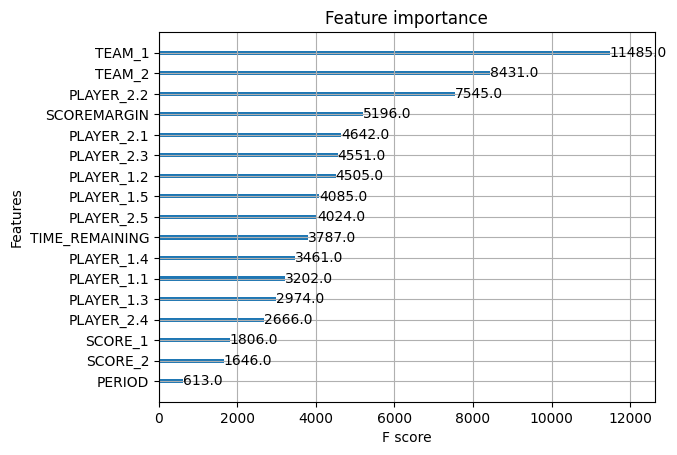

In [19]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.show()
